<a href="https://colab.research.google.com/github/jiin124/Deep_learning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [43]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [44]:
model=model_fn()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5,verbose=0)

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


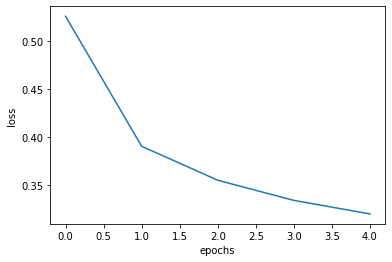

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

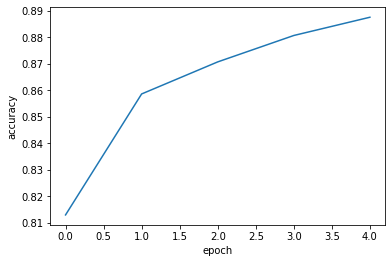

In [48]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

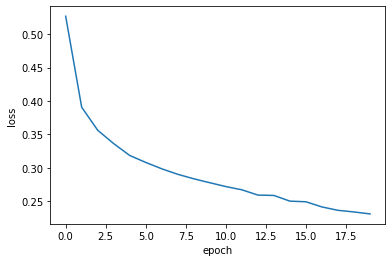

In [49]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


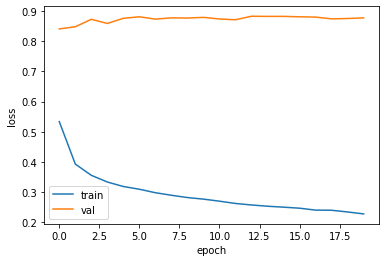

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

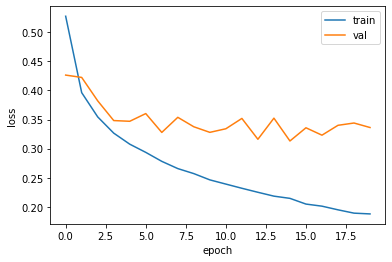

In [53]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [54]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               78500     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


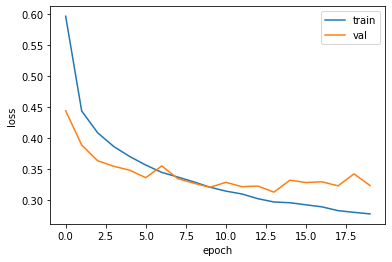

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 모델 저장과 복원

In [56]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=10,verbose=0,
                  validation_data=(val_scaled,val_target))

In [57]:
model.save_weights('model-weights.h5')

In [58]:
model.save('model-whole.h5')

In [59]:
!ls -al *.h5

-rw-r--r-- 1 root root 333272 Jan  3 11:47 'model=weights.h5'
-rw-r--r-- 1 root root 333448 Jan  3 12:54  model-weights.h5
-rw-r--r-- 1 root root 982664 Jan  3 12:54  model-whole.h5


In [60]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [61]:
import numpy as np

val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

0.8819166666666667


In [62]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3253 - accuracy: 0.8819


[0.32534539699554443, 0.8819166421890259]

## 콜백

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuaracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled,train_target,epochs=20,verbose=0,
          validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

In [ ]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

In [65]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoints_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

In [67]:
print(early_stopping_cb.stopped_epoch)

13


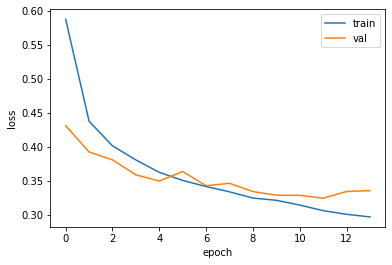

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [69]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8829


[0.33547770977020264, 0.8829166889190674]